In [ ]:
pip install dlib

In [ ]:
!pip install Ipython

In [ ]:
pip install face_recognition

In [1]:

from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
  hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
  urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")
from ttmg import(
    loadingAn,
    textAn,
)
loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')

os.system('pip install bing-image-downloader')
os.system('pip install face_recognition')
from sklearn.cluster import DBSCAN
from imutils import build_montages
import numpy as np
from bing_image_downloader import downloader
from requests import exceptions
from google.colab import drive
import os
from imutils import paths
import pickle
import cv2
from google.colab.patches import cv2_imshow
from imutils.video import VideoStream
import face_recognition
import imutils
import time

clear_output()
print('Installation finished.')


Installation finished.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#@title Select your choice of source
Choices = 'online' #@param ['online','Personal']
print('Selected:',Choices)




Selected: online


In [9]:
#@title Enter the address of GDrive(choice=Personal)
bool_private = False
Address = ' ' #@param {type:"string"}
drive_path = '/content/drive'
final_path = os.path.join(drive_path,Address)
if (len(Address)>0):
  bool_private = True
  print('Final Address:')
  print(final_path)


Final Address:
/content/drive/ 


In [4]:
#@title Enter name of your fav people (Choice = online)
Names = ' Kaley Cuoco, Jim Parsons, Johnny Galecki, Mayim Bialick, Kunal Nayyer, Simon Helberg' #@param {type:"string
Names_lower = Names.lower().replace(' ','_')
var_lower = Names_lower.split(",")
My_dict = Names.split(",")
print('Selected: ')
print(*My_dict, sep= ",")


Selected: 
 Kaley Cuoco, Jim Parsons, Johnny Galecki, Mayim Bialick, Kunal Nayyer, Simon Helberg


In [5]:
#@title Enter directory for result
directory = 'Images4' #@param{type:"string"}
output_path = os.path.join("drive/MyDrive/",directory)
print("Final directory: ")
print(output_path)

Final directory: 
drive/MyDrive/Images4


In [6]:
#@title Number of images per person

Number =  "100"#@param{type: "string"}
Number = int(Number)
print ('Number of Images: ')
print(Number)


Number of Images: 
100


In [7]:
#@title Download the images
categories ={}
for i in range(len(My_dict)):
  categories[var_lower[i]] = My_dict[i]
img_paths ={}
loadingAn(name="lds")
textAn("Downloading images...", ty='twg')

for query, name in categories.items():
  downloader.download(name,limit=Number,output_dir=output_path,adult_filter_off=True,force_replace=False,timeout=60)
clear_output()
print("Downloaded")

Downloaded


In [10]:
#@title Face Encodings

if (bool_private):
  output_directory =  final_path

imagePaths = list(paths.list_images(os.path.join('/content/',output_path)))

knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):
  if (i%20==0):    
      print("[INFO] processing image {}/{}".format(i + 1,
        len(imagePaths)))
  name = imagePath.split(os.path.sep)[-2]
  image = cv2.imread(imagePath)
  if image is None:
      print("[INFO] deleting: {}".format(imagePath))
      os.remove(imagePath)
      continue
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,
    model="hog")
  encodings = face_recognition.face_encodings(rgb, boxes)
  for encoding in encodings:
    knownEncodings.append(encoding)
    knownNames.append(name)
clear_output()
print("Processed all %d images" % (len(imagePaths)))

Processed all 599 images


In [11]:
#@title Serialize face encodings of all images 
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open("encodings.pickle", "wb")
f.write(pickle.dumps(data))
f.close()
clear_output()
print("Done ")

Done 


In [12]:
#@title Upload test image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
key, value = list(uploaded.items())[0]
filename=key
clear_output()
print("Image loaded")

Image loaded


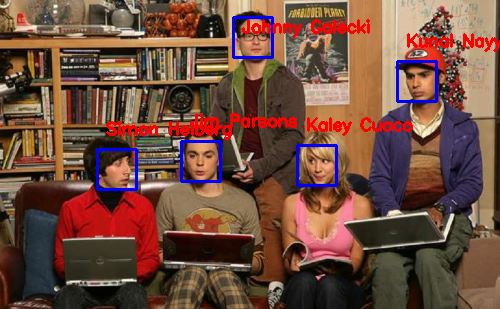

In [14]:
#@title Running on test image
data = pickle.loads(open("/content/encodings.pickle", "rb").read())
image = cv2.imread(os.path.join('/content/',filename))
image = imutils.resize(image, width=500)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = face_recognition.face_locations(rgb,
	model="cnn")
encodings = face_recognition.face_encodings(rgb, boxes)
names = []
for encoding in encodings:
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"
	if True in matches:
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1
		name = max(counts, key=counts.get)
	
	names.append(name)
for ((top, right, bottom, left), name) in zip(boxes, names):
	cv2.rectangle(image, (left, top), (right, bottom), (255,0 , 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.55, (0, 0, 255), 2)
cv2_imshow(image)

In [15]:
#@title ←  Upload test video
from google.colab import files

uploaded = files.upload()
#Uploading the video

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
key, value = list(uploaded.items())[0]
filename=key
clear_output()
print("Video loaded")

Video loaded


In [16]:
#@title Get face-identified video in output folder
cap = cv2.VideoCapture(os.path.join('/content/',filename))
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
data = pickle.loads(open("/content/encodings.pickle", "rb").read())
vs = VideoStream(src=0).start()
writer = None
time.sleep(2.0)
input=os.path.join('/content/',filename)
output = str(output_path)+'/video_result.mp4'
display_ = 1
video_file=True
vs = cv2.VideoCapture(input)
cur_frame=0

while True:
  
  if video_file:
        (grabbed, frame) = vs.read()
        if not grabbed:
            break
  else:
        frame = vs.read()
  cur_frame+=1
  if (cur_frame%100==0):
      print("Processing %d / %d frame" %(cur_frame,length))

  rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  rgb = imutils.resize(frame, width=750)
  r = frame.shape[1] / float(rgb.shape[1])
  boxes = face_recognition.face_locations(rgb,model="cnn") 
  encodings = face_recognition.face_encodings(rgb, boxes)
  names = []
  for encoding in encodings:

    matches = face_recognition.compare_faces(data["encodings"],encoding)
    name = "Unknown"  
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}

        for i in matchedIdxs:
          name = data["names"][i]
          counts[name] = counts.get(name, 0) + 1
  
        name = max(counts, key=counts.get)

        names.append(name)
  for ((top, right, bottom, left), name) in zip(boxes, names):

        top = int(top * r)
        right = int(right * r)
        bottom = int(bottom * r)
        left = int(left * r)

        cv2.rectangle(frame, (left, top), (right, bottom),
          (0, 255, 0), 2)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(frame, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
          0.75, (0, 255, 0), 2)
  if writer is None and output is not None:
      fourcc = cv2.VideoWriter_fourcc(*"MJPG")
      writer = cv2.VideoWriter(output, fourcc, 20,
        (frame.shape[1], frame.shape[0]), True)
  if writer is not None:
    writer.write(frame)

vs.release()
if writer is not None:
  writer.release()
clear_output()
print('Saved video to: ',end='')
print(str(output_path)+'/video_result.mp4')

Saved video to: drive/MyDrive/Images4/video_result.mp4


[INFO] # Unique faces: 9
[INFO] faces for face ID: 0


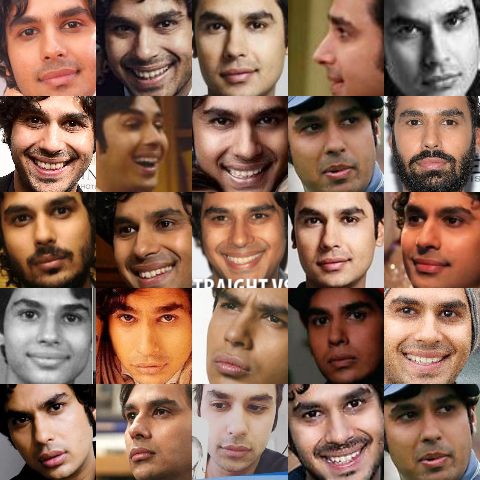

[INFO] faces for face ID: 1


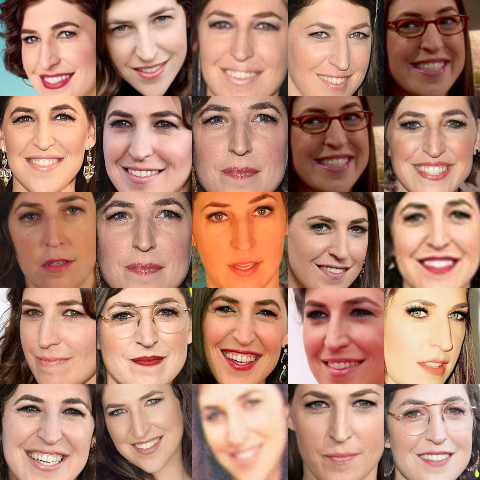

[INFO] faces for face ID: 2


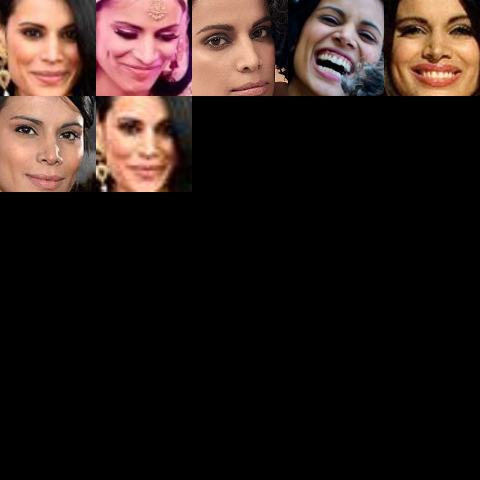

[INFO] faces for face ID: 3


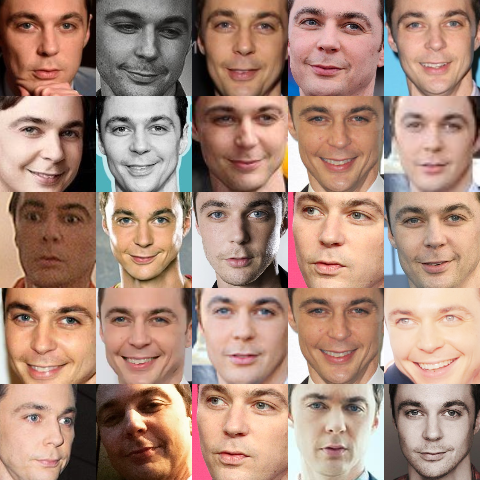

[INFO] faces for face ID: 4


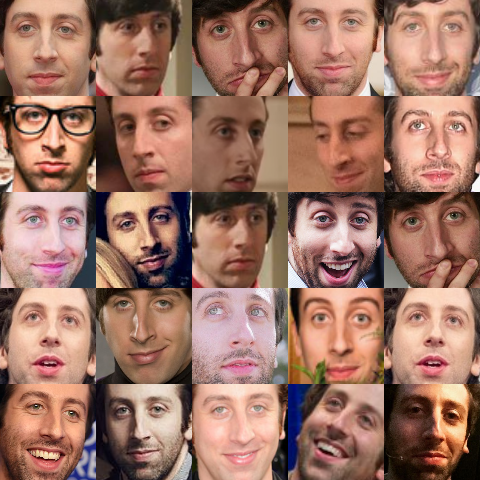

[INFO] faces for face ID: 5


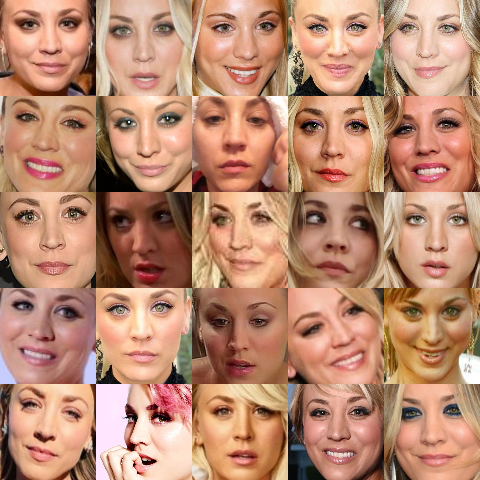

[INFO] faces for face ID: 6


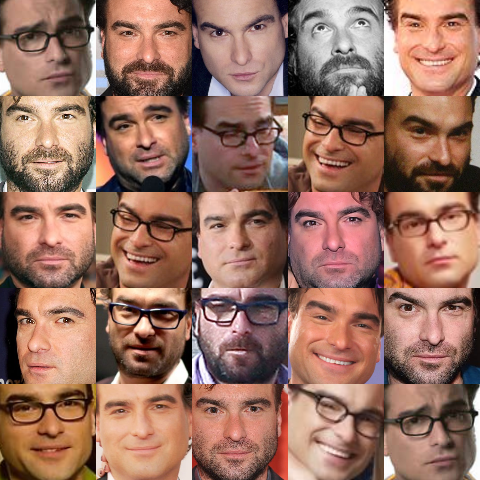

[INFO] faces for face ID: 7


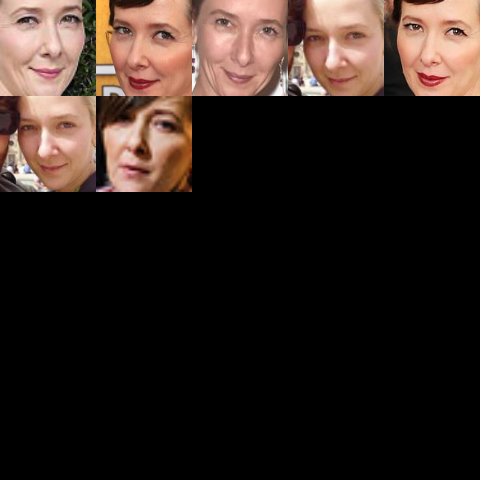

[INFO] faces for face ID: 8


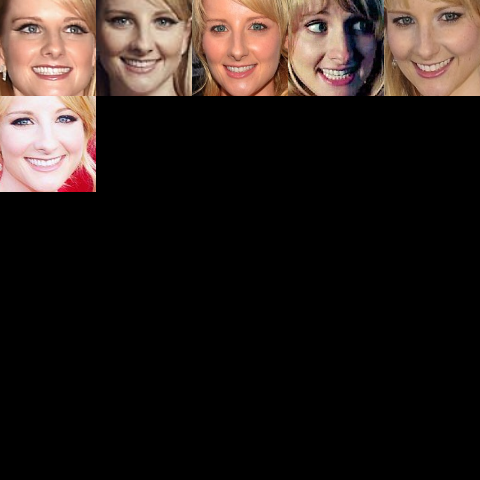

In [17]:
#@title Collection of similar faces
loadingAn(name="lds")
textAn("Building Montage...", ty='twg')
dataset_cluster = output_path
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images(dataset_cluster))
data = []
imagePaths.reverse()
for (i, imagePath) in enumerate(imagePaths):
  if((i+1)%50==0):
    print("[INFO] processing image {}/{}".format(i + 1,
      len(imagePaths)))
  print(imagePath)
  image = cv2.imread(imagePath)
  if image is None:
      os.remove(imagePath)
      continue
  else:
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      boxes = face_recognition.face_locations(rgb,
        model='hog')
      encodings = face_recognition.face_encodings(rgb, boxes)
      d = [{"imagePath": imagePath, "loc": box, "encoding": enc}
        for (box, enc) in zip(boxes, encodings)]
      data.extend(d)
print("[INFO] serializing encodings...")
f = open('encodings_cluster.pickle', "wb")
f.write(pickle.dumps(data))
f.close()
print("[INFO] loading encodings...")
data = pickle.loads(open('encodings_cluster.pickle', "rb").read())
data = np.array(data)
encodings = [d["encoding"] for d in data]
print("[INFO] clustering...")
clt = DBSCAN(metric="euclidean", n_jobs=-1)
clt.fit(encodings)
labelIDs = np.unique(clt.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
clear_output()
print("[INFO] # Unique faces: {}".format(numUniqueFaces))
for labelID in labelIDs[1:]:
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = np.where(clt.labels_ == labelID)[0]
  idxs = np.random.choice(idxs, size=min(25, len(idxs)),
    replace=False)
  faces = []
  for i in idxs:
    image = cv2.imread(data[i]["imagePath"])
    (top, right, bottom, left) = data[i]["loc"]
    face = image[top:bottom, left:right]
    face = cv2.resize(face, (96, 96))
    faces.append(face)
  montage = build_montages(faces, (96, 96), (5, 5))[0]
  
  title = "Face ID #{}".format(labelID)
  title = "Unknown Faces" if labelID == -1 else title
  cv2_imshow(montage)